<a href="https://colab.research.google.com/github/Shyam-S-Mishra/Shyam_S_Mishra_Supervised-ML_Capstone_Project_Classification/blob/main/Shyam_Shubham_Mishra_Supervised_ML_Capstone_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
# Project Name - Mobile Price Range Prediction

Project Type - Classification / Supervised Machine Learning

Contribution - Individual

>
# Project Summary

Today in a technology driven world, mobile phone is one of the most essential commodities of human. The market captilization of mobile phones is immensively huga. India has become the leading and second-largest smartphone market in the world. In 2021, the total number of mobile phone users in India is expected to touch 760 million. This number will rise to 3.8 billion smartphone users all over the world. 

These smartphones comes under the names of various brands with various specifications and price range. As a company perspective there must be an specific strategy for determining the price of the phones according to the provided feaures. And also from a customer perpective, before purcahsing a phone one sees the specifications and determines weather it is under priced, fair priced or overpriced.

In this project, I will perform experiments to predict the price range of various mobile phones on the basis of their specifications as provided in the given dataset. In this problem, I will not predict the actual price but a price range indicating how high the price is. 

Approach :-   

* Data Exploration
* EDA
* Data Cleaning
* Model Implimentation

Models to be used :-  

* Logistic Regression
* Decision Trees
* Random Forest
* XGBoost


>
# GitHub Link

https://github.com/Shyam-S-Mishra/Shyam_S_Mishra_Supervised-ML_Capstone_Project_Classification

>
# Problem Statement

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone (eg - RAM Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is. 

> 
# Let's Begin

>
# Data Exploration

>
## Importing Libraries

In [ ]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

>
## Dataset Loading

In [ ]:
# Mounting Drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset 

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Capstone_Project_Supervised_ML/data_mobile_price_range.csv')

>
## Dataset First View

In [ ]:
# Dataset First Look

dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


>
## Dataset Rows and Columns Count

In [ ]:
# Dataset Rows & Columns

dataset.shape

(2000, 21)

>
## Dataset Information

In [ ]:
# Dataset Information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

>
## About the Dataset

The above given dataset has various features about the specifications of mobile phones which determines the price of the mobile phone.

The given dataset has 2000 rows and 21 columns. There are no missing values and duplicate values in the dataset. 

The goal is to build a machine learning model that predicts the price range of the mobile phone indicating how high the price is.

>
# Understanding the Variables

In [ ]:
# Dataset Columns

dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Description

dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
# Checking unique values for each variable

dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

>
# Feature and Target Details

>
## Feature Details

Battery_power - Battery capacity in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory capacity

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in MB

Sc_h - Screen Height

Sc_w - Screen Width 

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not


>
## Target Details

Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

>
# Exploratory Data Analysis

In [ ]:
# splitting the categorical and numerical features for analysig the dataset

numerical_features = dataset[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

categorical_features = dataset[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [ ]:
# Counting the value vounts of the dependent variable 

dataset['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

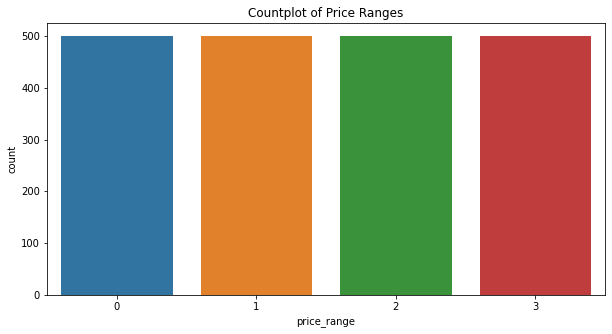

In [ ]:
# Visualizing the dependent variable i.e. Price_range

plt.figure(figsize=(10,5))
sns.countplot(x=dataset['price_range'])
plt.title('Countplot of Price Ranges')
plt.show()

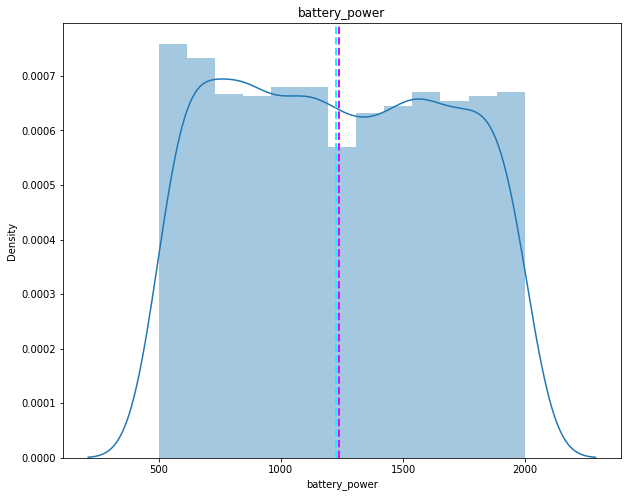

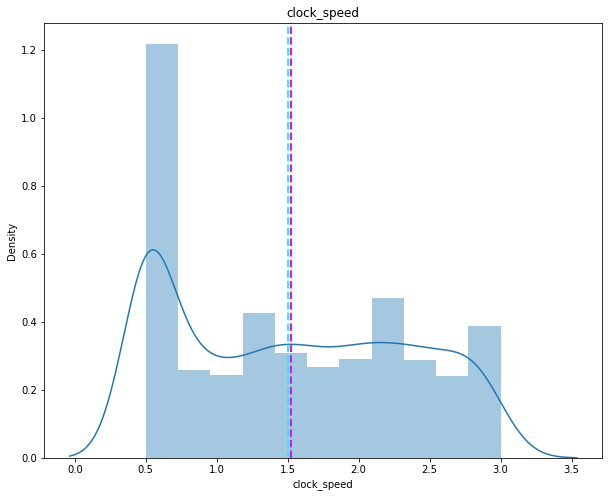

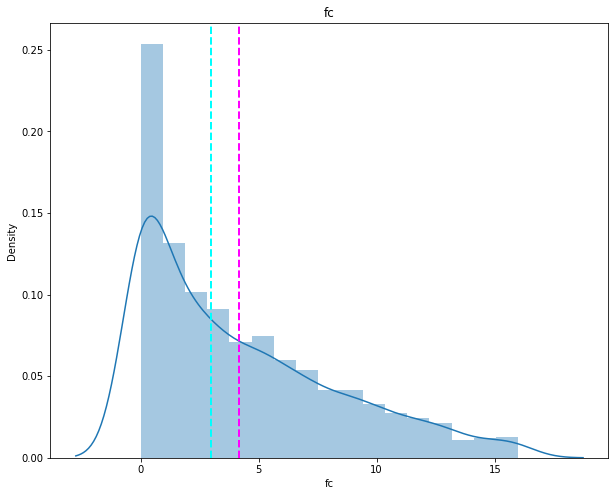

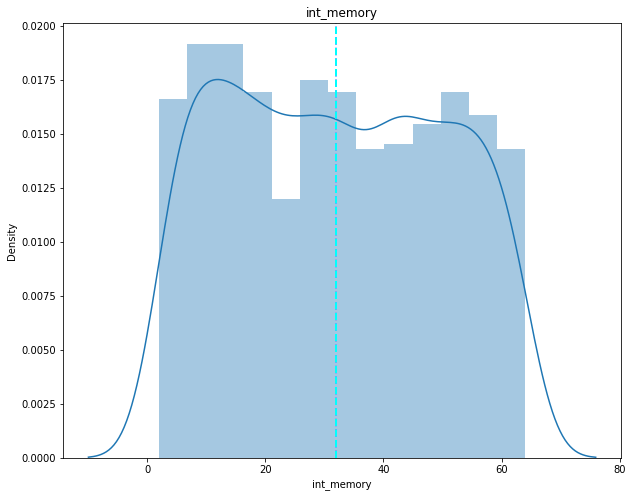

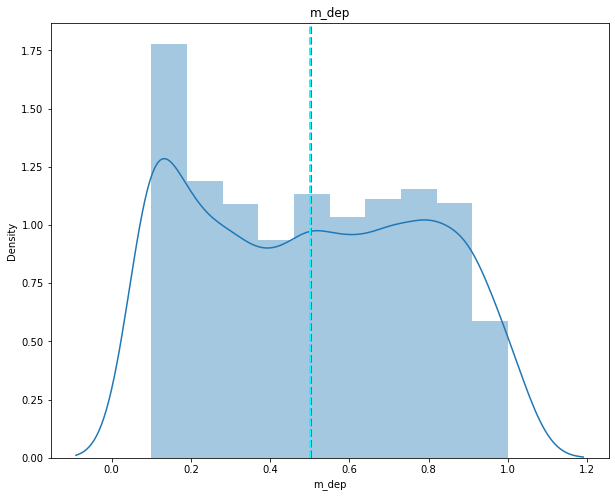

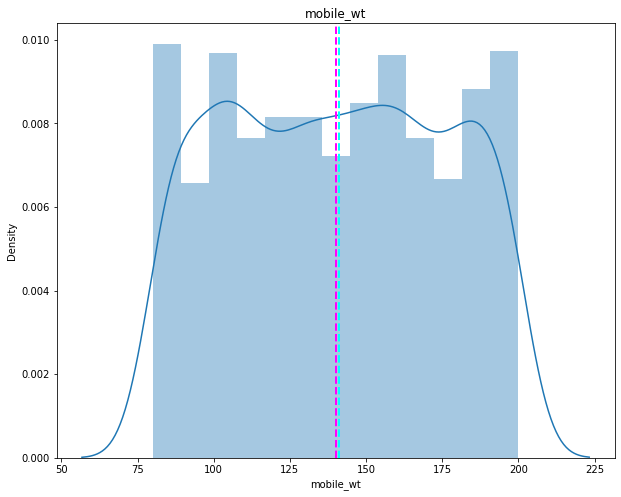

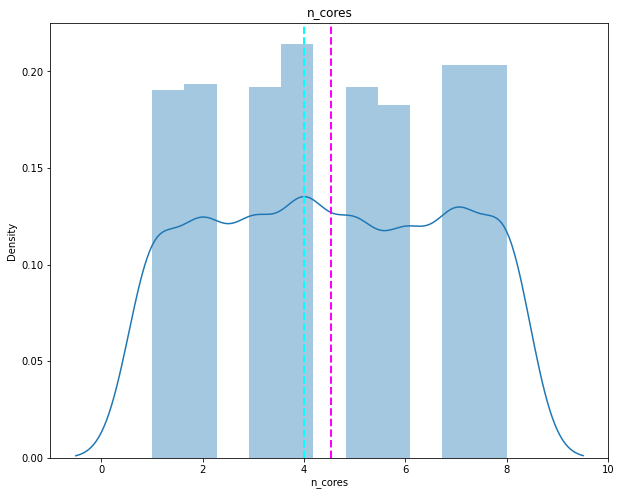

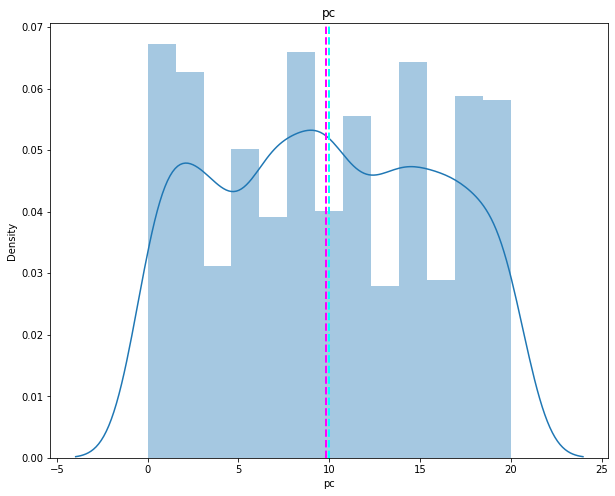

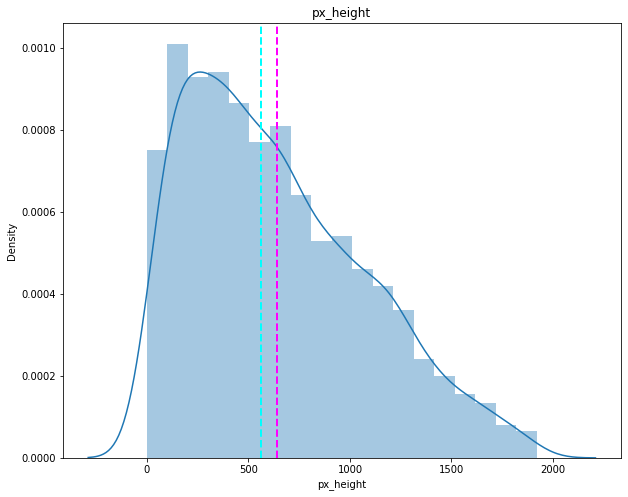

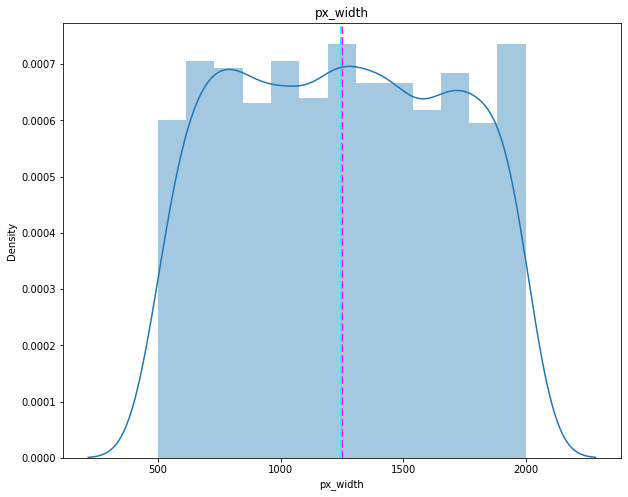

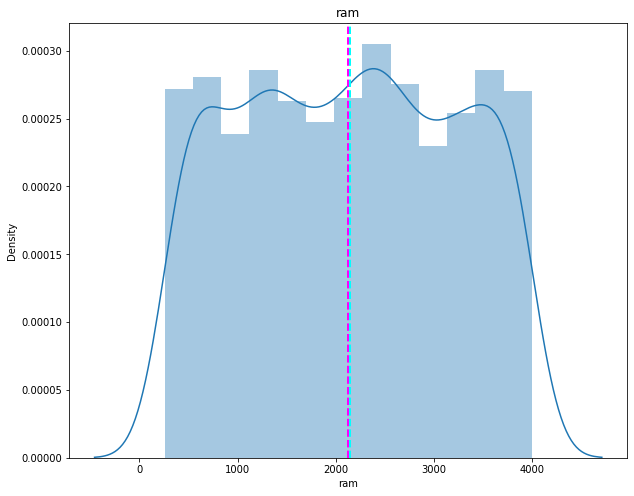

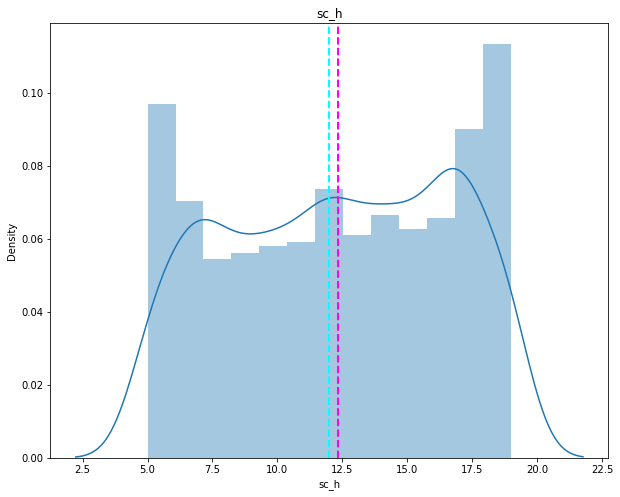

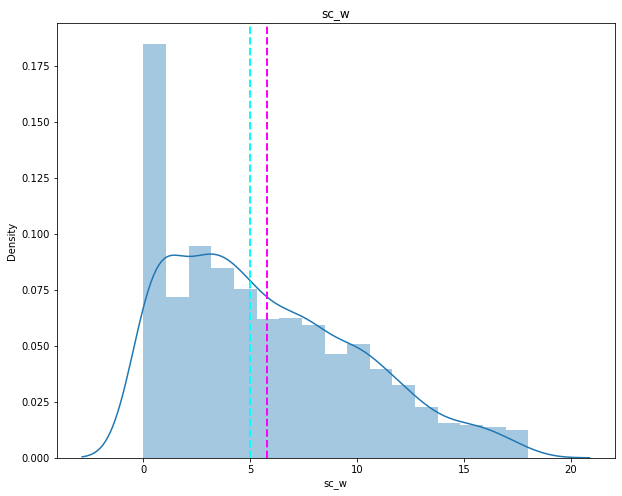

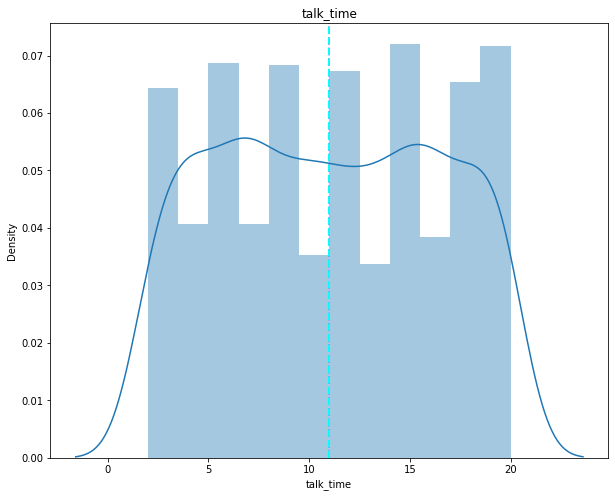

In [ ]:
# Visualizing the numerical independent variables

for column in numerical_features :
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca()
    feature = dataset[column]
    sns.distplot(dataset[column])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(column)
plt.show()

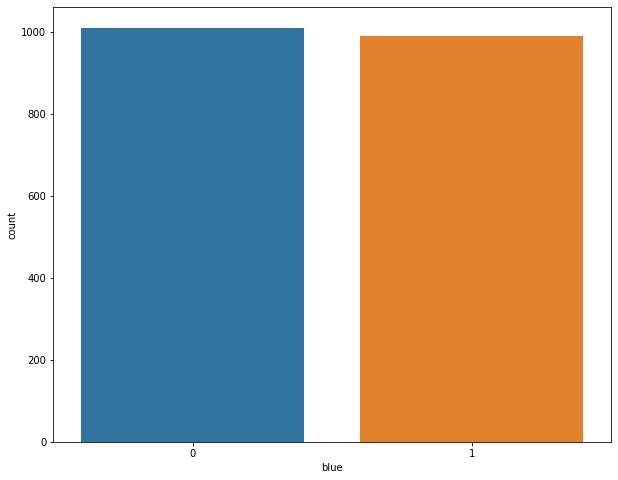

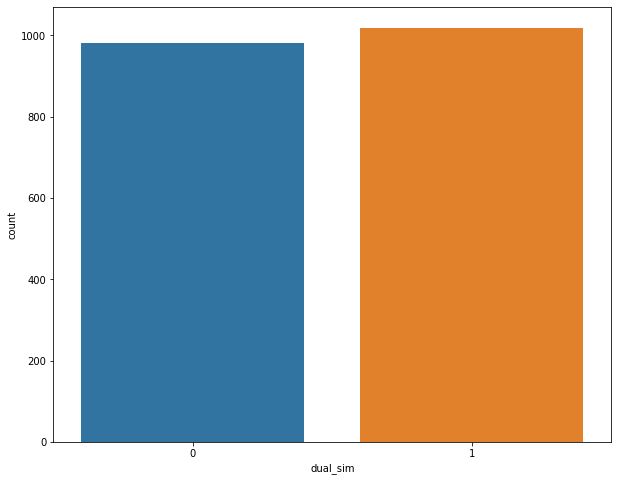

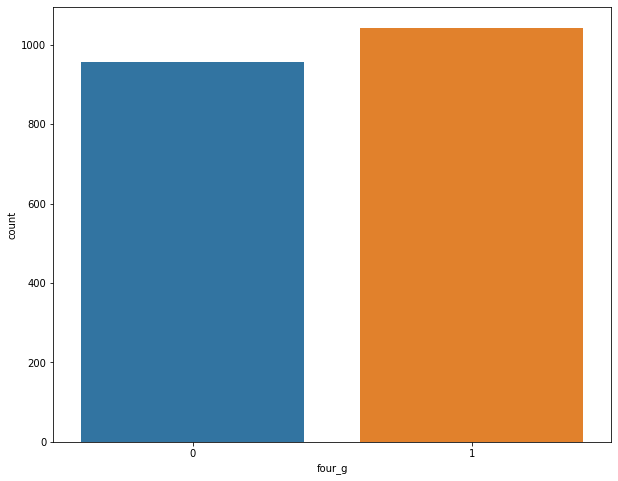

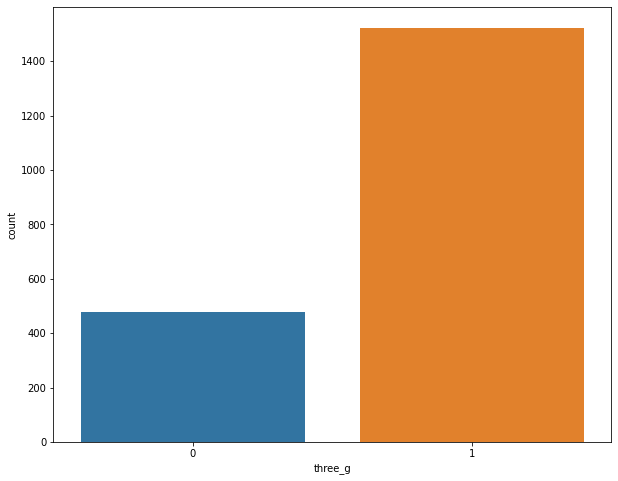

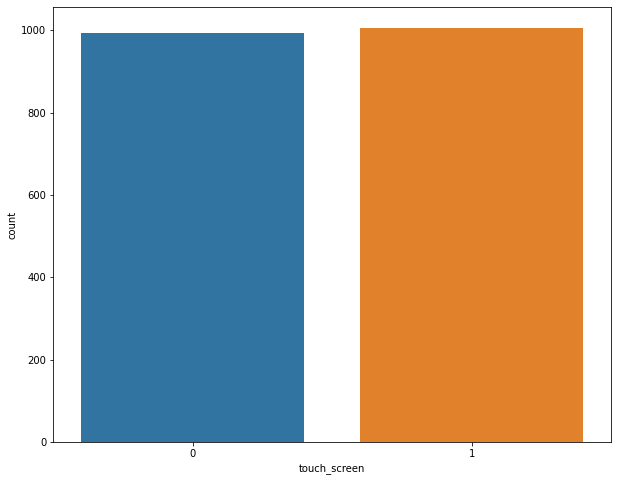

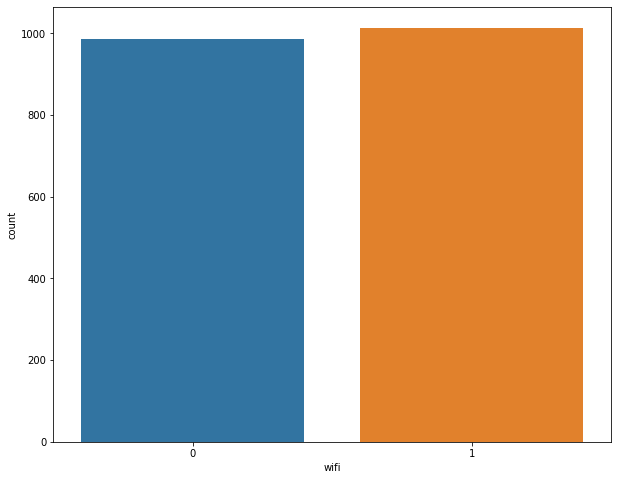

In [ ]:
# Visualizing the categorical independent variables 

for col in categorical_features:
  fig = plt.figure(figsize=(10,8))
  sns.countplot(x= dataset[col])

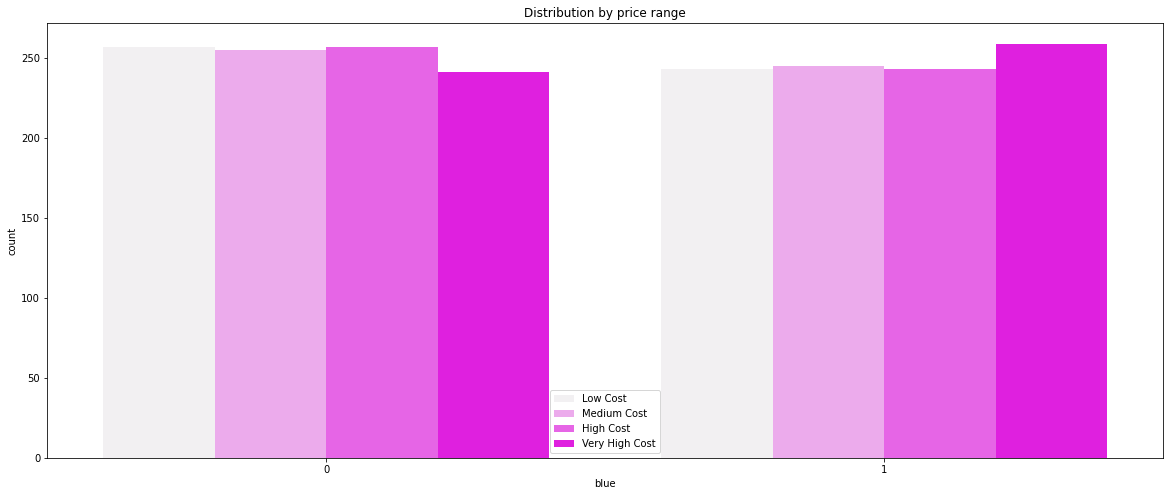

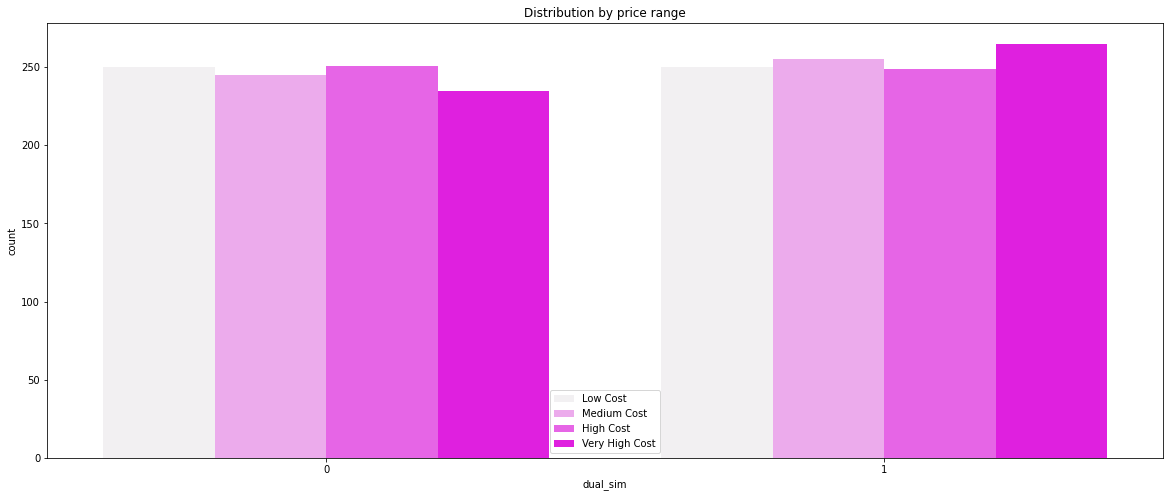

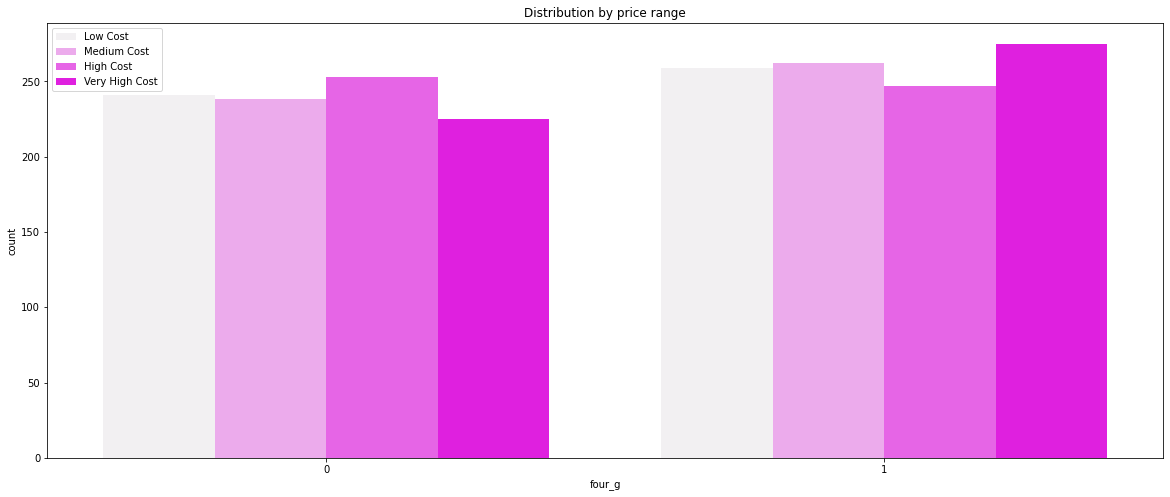

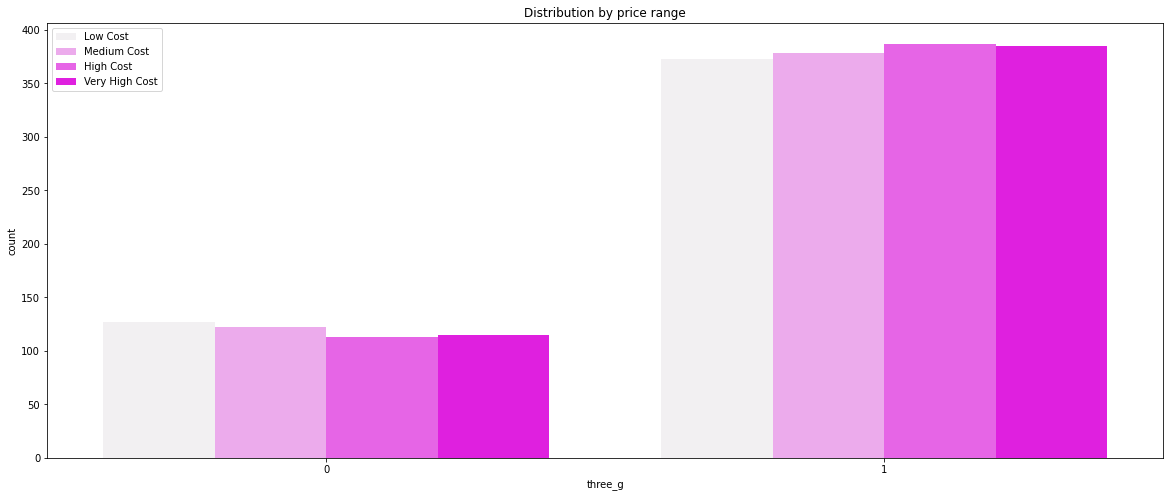

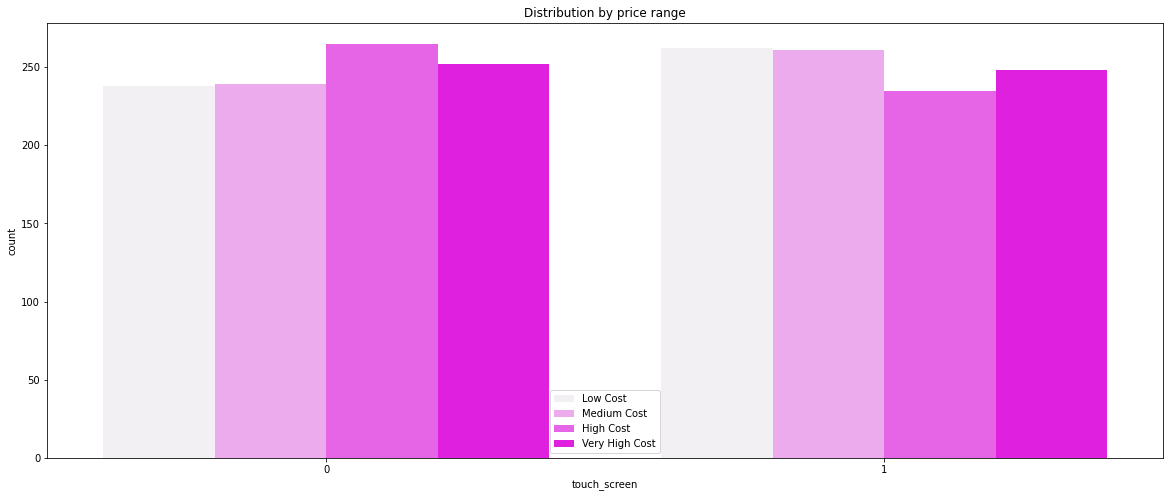

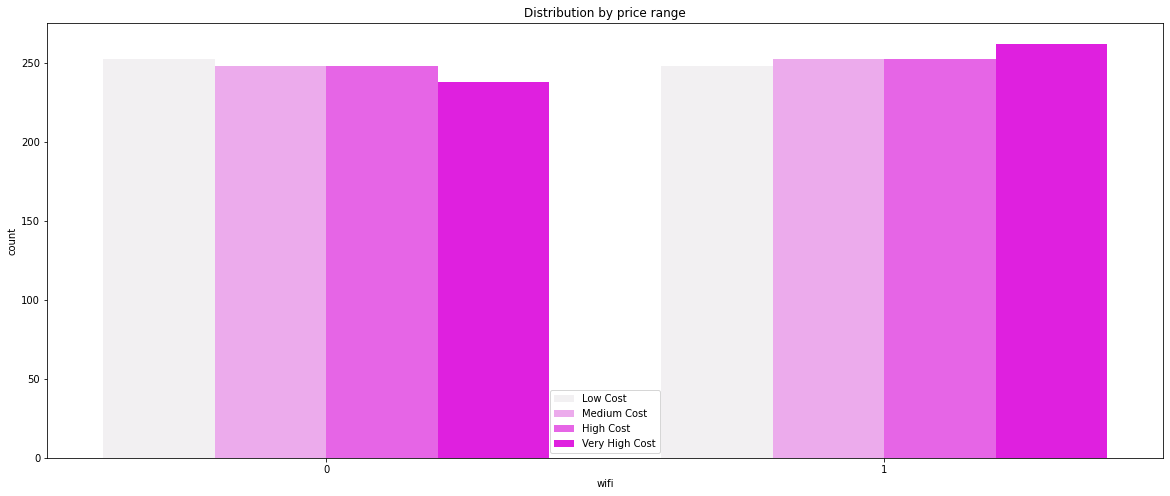

In [ ]:
# Visualizing categorical independent variables with dependent variable

for col in categorical_features :

  fig = plt.figure(figsize=(20,8))
  ax = fig.gca()
  sns.countplot(data=dataset, x= col, hue="price_range", color = 'magenta')
  ax.set_title('Distribution by price range')
  ax.set_xlabel(col)
  ax.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

<Axes: >

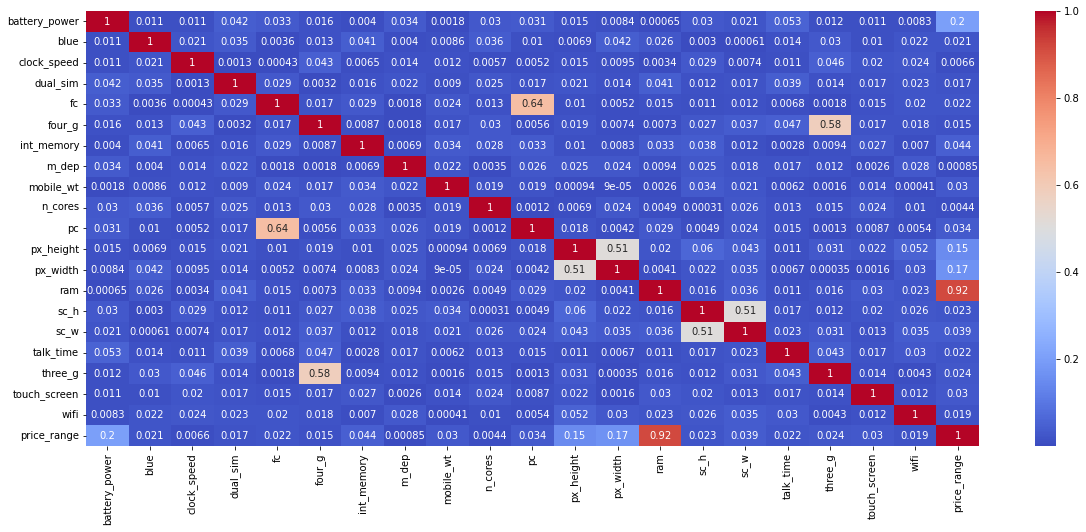

In [ ]:
# Creating a heat map to visualise the corelation between all the features

plt.figure(figsize=(20,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

>
# Data Cleaning

>
## Looking for duplicate values

In [ ]:
# Counting duplicate values in the dataset 

len(dataset[dataset.duplicated()])

0

>
## Checking for Null Values

In [ ]:
# Finding null values in the dataset

print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


>
## Checking for Outliers

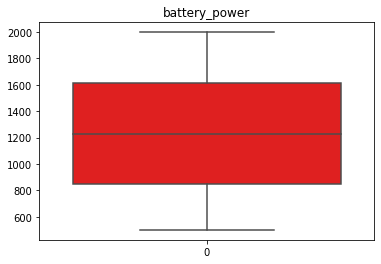

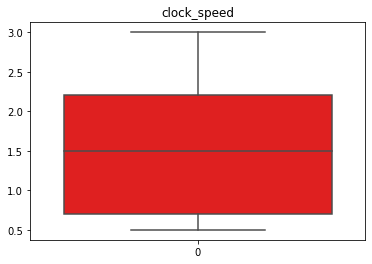

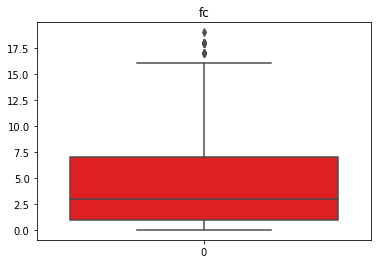

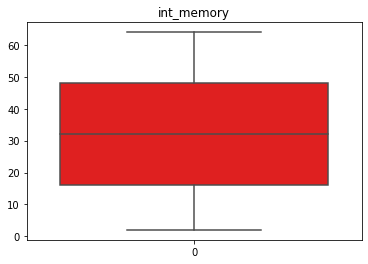

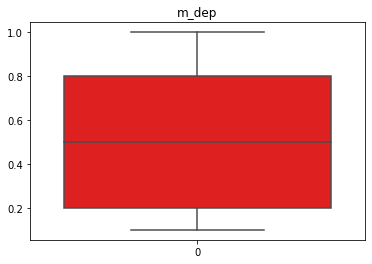

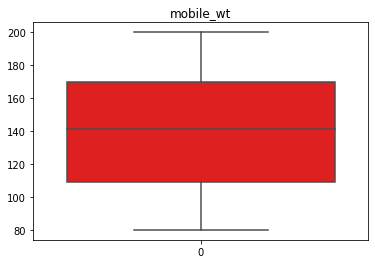

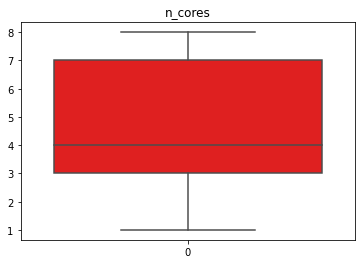

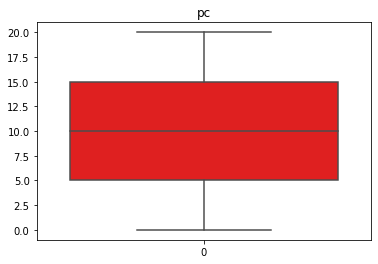

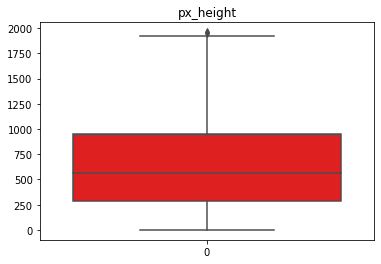

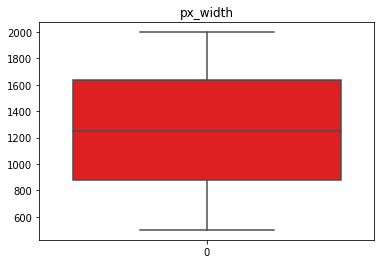

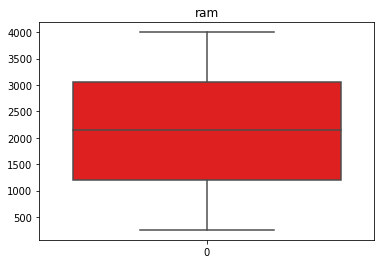

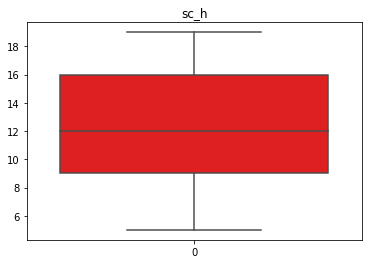

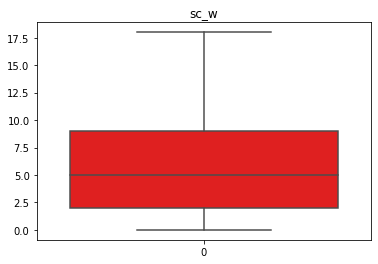

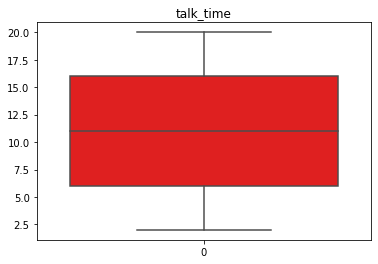

In [ ]:
# Creating box plots of the indendent variables for outlier checking

for col in numerical_features.columns:
  sns.boxplot(numerical_features[col],color='red')
  plt.title(col)
  plt.show()


Here, it is precise that outliers are present 'fc' column 'px_height' column.

>
### Removing the outliers

In [ ]:
# Removing outliers from "fc" column and replacing the data points that lie outside of the lower and the upper limit with a NULL value.

for x in ['fc']:
  fc_Q3,fc_Q1 = np.percentile(dataset.loc[:,x],[75,25])
  fc_IQR = fc_Q3-fc_Q1

  fc_upper = fc_Q3 + (1.5*fc_IQR)
  fc_lower = fc_Q1 - (1.5*fc_IQR)

  dataset.loc[dataset[x] < fc_lower,x] = np.nan
  dataset.loc[dataset[x] > fc_upper,x] = np.nan

In [ ]:
# Removing outliers from "px_height" column and replacing the data points that lie outside of the lower and the upper limit with a NULL value.

for x in ['px_height']:
  px_height_Q3,px_height_Q1 = np.percentile(dataset.loc[:,x],[75,25])
  px_height_IQR = px_height_Q3-px_height_Q1

  px_height_upper = px_height_Q3 + (1.5*px_height_IQR)
  px_height_lower = px_height_Q1 - (1.5*px_height_IQR)

  dataset.loc[dataset[x] < px_height_lower,x] = np.nan
  dataset.loc[dataset[x] > px_height_upper,x] = np.nan

In [ ]:
# Finding null values in the dataset after outlier removal

dataset.isnull().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc               18
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         2
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

Since, the proportion of null values is comparatively low i.e. 1%. Hence, we will drop the null values

In [ ]:
# Now, dropping the rows with null values 

dataset = dataset.dropna(axis = 0)

In [ ]:
# Finding null values in the dataset after dropping the null values from the dataset

dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Shape of the dataset after data cleaning

dataset.shape

(1980, 21)

>
# Model Implimentation

In [ ]:
# Assigning independent and dependebt variables

# Independent Variables 

x = dataset.drop(columns=['price_range'])

# Dependent Variables

y = dataset['price_range']

In [ ]:
# Scaling the values of x

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
# Splitting the dataset into training dataset and testing dataset into 80% and 20% respectively

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Finding the shapes of the training and testing dataset 

print("Shape of the x_train dataset :",x_train.shape)
print("Shape of the x_test dataset :",x_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

Shape of the x_train dataset : (1584, 20)
Shape of the x_test dataset : (396, 20)
Shape of the y_train dataset : (1584,)
Shape of the y_test dataset : (396,)


>
## Logistic Regression

Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values.It produces a logistic curve, which is limited to values between 0 and 1 and models the probability that each input belongs to a particular category.

In [ ]:
# Fitting logistic regression model

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Getting the model coefficients

log_reg.coef_

array([[-5.79245017e-04,  3.02645088e-04,  1.11302819e-03,
         2.66719314e-04,  1.49073147e-03,  2.87603625e-04,
         1.65503104e-02,  2.47020268e-04,  4.71056085e-02,
         3.35685976e-03,  5.07594455e-03, -2.34092537e-03,
         1.42416495e-03, -4.51267113e-03,  7.90586393e-03,
         3.97379055e-03,  5.20276126e-03,  4.10378660e-04,
         3.35863723e-04,  3.43746271e-04],
       [ 7.25706820e-05,  1.54267277e-04,  4.20228357e-05,
         2.52115681e-04,  1.30937913e-03,  1.87141676e-04,
         6.90068911e-03,  1.99238800e-04,  1.11268427e-02,
        -4.13695450e-04,  2.14481249e-03, -1.51992920e-04,
         3.89682717e-04, -4.99001495e-04,  2.21260872e-03,
         5.01324832e-04,  4.00748712e-03,  1.63400397e-04,
         2.38875516e-04,  9.45359335e-05],
       [ 2.46990463e-04, -1.71339216e-04, -6.66694850e-05,
        -2.02748535e-04,  3.63413904e-04, -2.78678177e-04,
        -9.06556780e-03, -1.17607930e-04, -1.48799119e-02,
         6.19639062e-04, -1.5

In [ ]:
# Getting the model intercept

log_reg.intercept_

array([ 0.0006315 ,  0.00018852, -0.00010486, -0.00071516])

In [ ]:
# Making prediction by the trained model

y_pred_train_log_reg = log_reg.predict(x_train)
y_pred_test_log_reg = log_reg.predict(x_test)

In [ ]:
# Evaluation Metrices for training dataset

print('Classification report for Logistic Regression (Training set)= \n')
print(classification_report(y_pred_train_log_reg, y_train))

Classification report for Logistic Regression (Training set)= 

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       374
           1       0.56      0.55      0.55       407
           2       0.46      0.49      0.48       382
           3       0.74      0.67      0.70       421

    accuracy                           0.63      1584
   macro avg       0.63      0.63      0.63      1584
weighted avg       0.64      0.63      0.63      1584



In [ ]:
# Evaluation Metrices for testing dataset

print('Classification report for Logistic Regression (Testing set)= \n')
print(classification_report(y_pred_test_log_reg, y_test))

Classification report for Logistic Regression (Testing set)= 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       104
           1       0.52      0.56      0.54        85
           2       0.42      0.45      0.44        87
           3       0.76      0.72      0.74       120

    accuracy                           0.65       396
   macro avg       0.64      0.63      0.63       396
weighted avg       0.66      0.65      0.65       396



>
## Decision Trees

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [ ]:
# Fitting model on training dataset 

price_range_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)
price_range_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [ ]:
# Prediction on testing & training dataset 

y_pred_train_DT = price_range_classifier.predict(x_train)
y_pred_test_DT = price_range_classifier.predict(x_test)

In [ ]:
# Evaluation metrics for training dataset

print('Classification report for Decision Tree (Training set)= \n')
print(classification_report(y_pred_train_DT, y_train))

Classification report for Decision Tree (Training set)= 

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       363
           1       0.79      0.66      0.72       483
           2       0.57      0.70      0.63       331
           3       0.87      0.81      0.84       407

    accuracy                           0.76      1584
   macro avg       0.77      0.77      0.76      1584
weighted avg       0.77      0.76      0.77      1584



In [ ]:
# Evaluation metrics for testing dataset

print('Classification report for Decision Tree (Testing set)= \n')
print(classification_report(y_pred_test_DT, y_test))

Classification report for Decision Tree (Testing set)= 

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        83
           1       0.76      0.60      0.67       119
           2       0.67      0.73      0.70        85
           3       0.87      0.90      0.88       109

    accuracy                           0.76       396
   macro avg       0.75      0.76      0.75       396
weighted avg       0.76      0.76      0.75       396



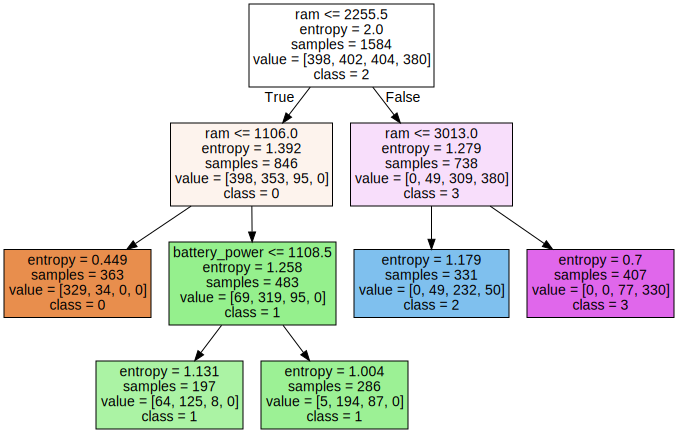

In [ ]:
# Visualization of Decision Tree

graph = Source(tree.export_graphviz(price_range_classifier, out_file=None
   , feature_names=x_train.columns, class_names=['0', '1', '2', '3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

Decision tree identifies the most significant variable and it’s value that gives best homogeneous sets of population.

In [ ]:
# Cross Validation and hyper-parameter tunning

price_range_classifier_cross = GridSearchCV(price_range_classifier, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
price_range_classifier_cross.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.804 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.779 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.767 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.716 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_leaf_nodes=5,
                                              random_state=0),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
# Prediction by cross validation

y_pred_test_DT_Cross = price_range_classifier_cross.predict(x_test)
y_pred_train_DT_Cross = price_range_classifier_cross.predict(x_train)

In [ ]:
# Evaluation metrics for training dataset

print('Classification Report for Decision Tree by Cross Validation (Training set)= \n')
print(classification_report(y_train, y_pred_train_DT_Cross))

Classification Report for Decision Tree by Cross Validation (Training set)= 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       398
           1       0.98      0.97      0.98       402
           2       0.98      0.98      0.98       404
           3       0.99      0.99      0.99       380

    accuracy                           0.99      1584
   macro avg       0.99      0.99      0.99      1584
weighted avg       0.99      0.99      0.99      1584



In [ ]:
# Evaluation metrics for testing dataset

print('Classification Report for Decision Tree by Cross Validatin (Testing set)= \n')
print(classification_report(y_test, y_pred_test_DT_Cross))

Classification Report for Decision Tree by Cross Validatin (Testing set)= 

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        98
           1       0.77      0.76      0.77        93
           2       0.79      0.79      0.79        92
           3       0.93      0.88      0.90       113

    accuracy                           0.84       396
   macro avg       0.83      0.83      0.83       396
weighted avg       0.84      0.84      0.84       396



>
## Ranodm Forest

Decision trees are prone to overfitting and to cope with it we do ensembling of decision trees. Ensemble methods involve group of predictive models to achieve a better accuracy and model stability. Bagging is a way of ensembling decision trees. There are various implementations of bagging models. Random forest is one of them.

In [ ]:
# Fitting model on training dataset

RF_classifier =  RandomForestClassifier(criterion='entropy',max_depth=5) 
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [ ]:
# Prediction on testing & training dataset 

y_pred_train_RF = RF_classifier.predict(x_train)
y_pred_test_RF = RF_classifier.predict(x_test)

In [ ]:
# Evaluation metrics for training dataset

print('Classification report for Random Forest (Training set)= \n')
print(classification_report(y_pred_train_RF, y_train))

Classification report for Random Forest (Training set)= 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       409
           1       0.85      0.85      0.85       403
           2       0.84      0.87      0.85       392
           3       0.99      0.99      0.99       380

    accuracy                           0.92      1584
   macro avg       0.92      0.92      0.92      1584
weighted avg       0.92      0.92      0.92      1584



In [ ]:
# Evaluation metrics for testing dataset

print('Classification report for Random Forest (Testing set)= \n')
print(classification_report(y_pred_test_RF, y_test))

Classification report for Random Forest (Testing set)= 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       109
           1       0.74      0.78      0.76        89
           2       0.76      0.80      0.78        87
           3       0.92      0.94      0.93       111

    accuracy                           0.85       396
   macro avg       0.84      0.84      0.84       396
weighted avg       0.85      0.85      0.85       396



In [ ]:
# Variable Importance 

variable_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':RF_classifier.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

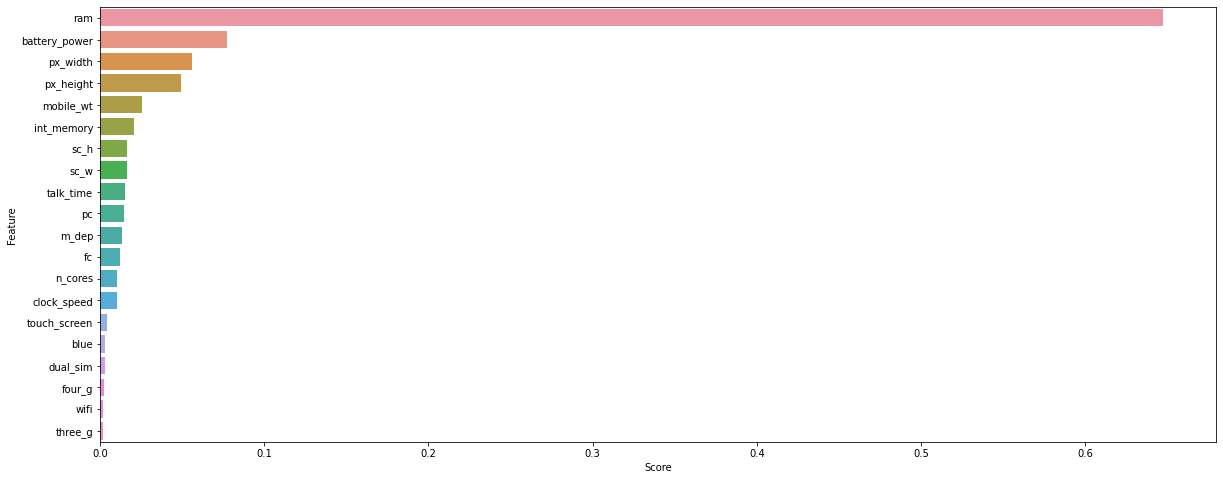

In [ ]:
# Visualizing the variable importance 

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(x=variable_importance['Score'], y=variable_importance['Feature'])
plt.show()

In [ ]:
# Hyper-parameter tunning for random forest classifier

params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
RF_cross = RandomForestClassifier()
RF_classifier_cross = GridSearchCV(RF_cross, param_grid = params, cv=5)

# Fit the object to train dataset
RF_classifier_cross.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]})

In [ ]:
# Prediction on testing & training dataset 

y_pred_train_RF_cross = RF_classifier_cross.predict(x_train)
y_pred_test_RF_cross = RF_classifier_cross.predict(x_test)

In [ ]:
# Evaluation metrics for training dataset

print('Classification report for Random Forest cross validation (Training set)= \n')
print(classification_report(y_pred_train_RF_cross, y_train))

Classification report for Random Forest cross validation (Training set)= 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       407
           1       0.91      0.93      0.92       395
           2       0.96      0.96      0.96       403
           3       0.99      0.99      0.99       379

    accuracy                           0.96      1584
   macro avg       0.96      0.96      0.96      1584
weighted avg       0.96      0.96      0.96      1584



In [ ]:
# Evaluation metrics for testing dataset

print('Classification report for Random Forest (Testing set)= \n')
print(classification_report(y_pred_test_RF_cross, y_test))

Classification report for Random Forest (Testing set)= 

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       108
           1       0.76      0.82      0.79        87
           2       0.85      0.83      0.84        94
           3       0.91      0.96      0.94       107

    accuracy                           0.87       396
   macro avg       0.87      0.87      0.86       396
weighted avg       0.87      0.87      0.87       396



>
## XGBoost

Boosting is another way of ensembling decision trees. There are various implementations of boosting models. XGBoost is one of them.

In [ ]:
# Importing necessary library for implimenting XGBoost classifier

from xgboost import XGBClassifier

# Implimenting XGB classifier

classifier_xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)

# Fitting XGB classifier

classifier_xgb.fit(x_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Prediction on testing & training dataset 

y_pred_train_xgb = classifier_xgb.predict(x_train)
y_pred_test_xgb = classifier_xgb.predict(x_test)

In [ ]:
# Evaluation metrics for training dataset

print('Classification report for XGBoost (Training set)= \n')
print(classification_report(y_pred_train_xgb, y_train))

Classification report for XGBoost (Training set)= 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       402
           2       1.00      1.00      1.00       404
           3       1.00      1.00      1.00       380

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584



In [ ]:
# Evaluation metrics for testing dataset

print('Classification report for XGBoost (Testing set)= \n')
print(classification_report(y_pred_test_xgb, y_test))

Classification report for XGBoost (Testing set)= 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       101
           1       0.86      0.89      0.87        90
           2       0.92      0.86      0.89        99
           3       0.90      0.96      0.93       106

    accuracy                           0.90       396
   macro avg       0.90      0.90      0.90       396
weighted avg       0.90      0.90      0.90       396



In [ ]:
# Implimentation of Cross validation for XGBoost Classifier

classifier_xgb_cross = GridSearchCV(classifier_xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)

# Fitting to training dataset

classifier_xgb_cross.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.861 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.883 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.852 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.883 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
# Prediction on testing & training dataset 

y_pred_train_xgb_cross = classifier_xgb_cross.predict(x_train)
y_pred_test_xgb_cross = classifier_xgb_cross.predict(x_test)

In [ ]:
# Evaluation metrics for training dataset

print('Classification report for XGBoost (Training set)= \n')
print(classification_report(y_pred_train_xgb_cross, y_train))

Classification report for XGBoost (Training set)= 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.99      0.98      0.98       406
           2       0.99      0.99      0.99       405
           3       0.99      1.00      1.00       378

    accuracy                           0.99      1584
   macro avg       0.99      0.99      0.99      1584
weighted avg       0.99      0.99      0.99      1584



In [ ]:
# Evaluation metrics for testing dataset

print('Classification report for XGBoost (Testing set)= \n')
print(classification_report(y_pred_test_xgb_cross, y_test))

Classification report for XGBoost (Testing set)= 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        99
           1       0.86      0.87      0.86        92
           2       0.90      0.87      0.89        95
           3       0.93      0.95      0.94       110

    accuracy                           0.90       396
   macro avg       0.90      0.90      0.90       396
weighted avg       0.90      0.90      0.90       396



>
# Conclusion

    
 * The dataset is perfectly balanced and the target variable i.e. price range of the mobile phones is distributed into four categories.
 * RAM is correlated with price range as shown in the heatmap.
 * Logistic Regression has not performed well as compared to other models.
 * XGBoost classifier gave the best results followed by random forest and decision tress.
 * RAM, battery power, pixel width, pixel height & mobile weight are the most significant columns which is responsible for the prediction of mobile price range.